In [10]:
import os
import sys
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt

sys.path.insert(1, os.path.join(sys.path[0], '..'))

from scheduler.plot import Plot
from scheduler.parser import parse_arguments

In [7]:
filenames=[
    "2022-07-27_05:22:41__latency_0_max_servers_10_timesteps_24",
    "2022-07-27_05:22:41__latency_25_max_servers_10_timesteps_24",
    "2022-07-27_05:22:41__latency_50_max_servers_10_timesteps_24",
]
conf = parse_arguments([])
dfs = [pd.read_csv(f"../saved/{name}.csv") for name in filenames]
dfs_grouped_by_timestep = [df.groupby("timestep") for df in dfs]

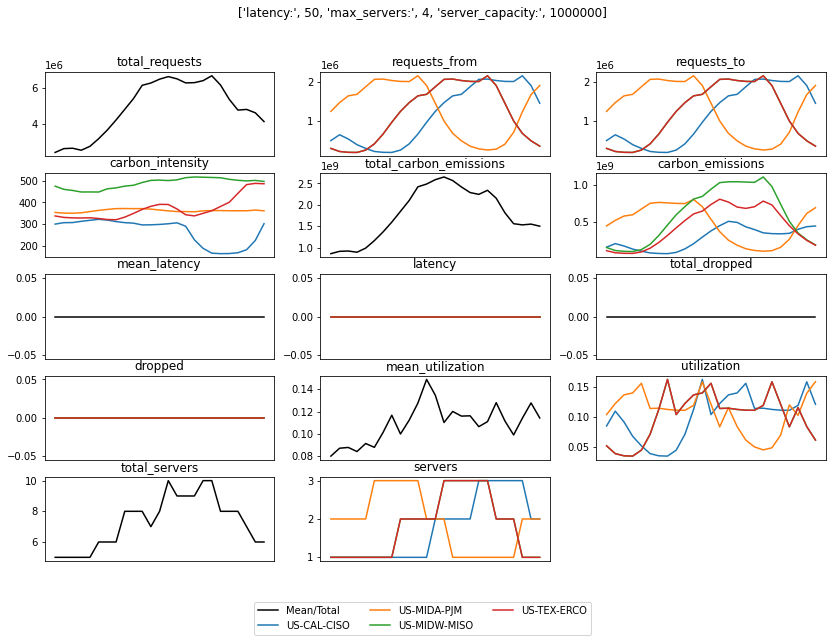

In [3]:
plot = Plot(conf)
plot.plot(df=dfs[0])

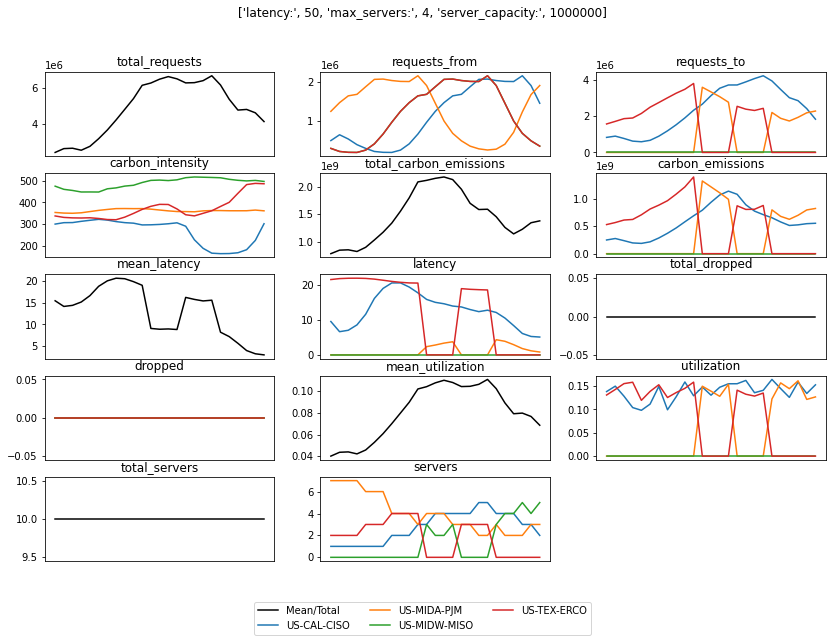

In [4]:
plot.plot(df=dfs[1])

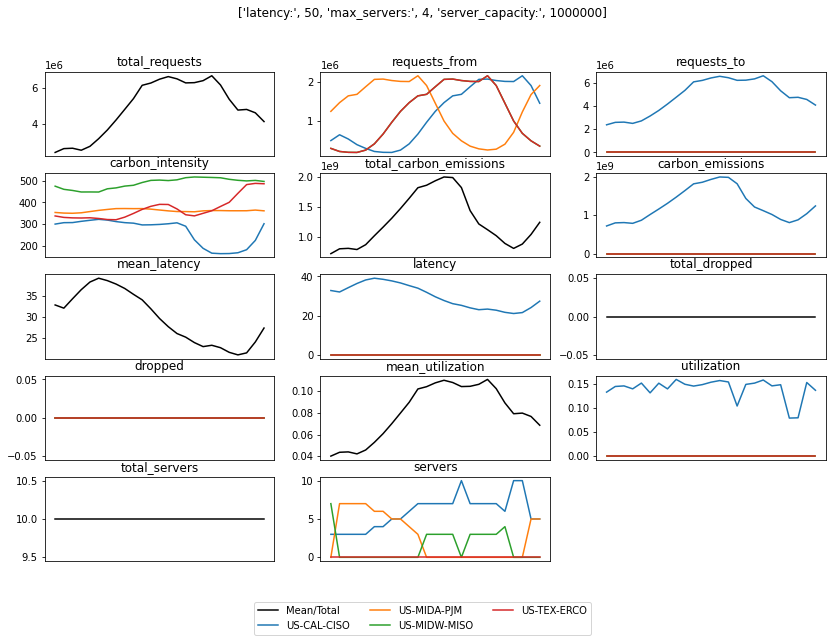

In [5]:
plot.plot(df=dfs[2])

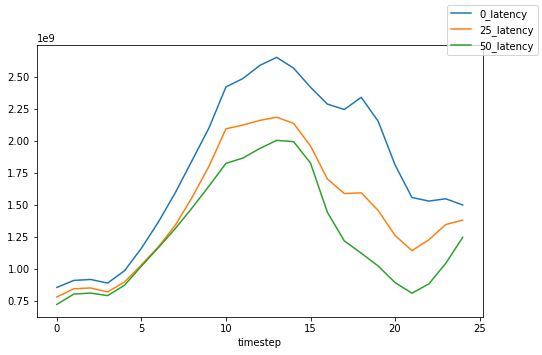

In [12]:
ax = None
fig = plt.figure(figsize=(8,5))
for df in dfs_grouped_by_timestep:
    ax = df["total_carbon_emissions"].sum().plot(ax=ax)
fig.legend(["0_latency", "25_latency", "50_latency"]);

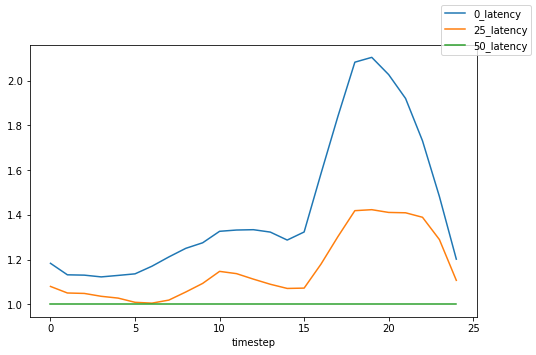

In [17]:
ax = None
fig = plt.figure(figsize=(8,5))
divisor = dfs_grouped_by_timestep[2]["total_carbon_emissions"].sum()
for df in dfs_grouped_by_timestep:
    p = df["total_carbon_emissions"].sum() / divisor
    ax = p.plot(ax=ax)
fig.legend(["0_latency", "25_latency", "50_latency"]);